In [1]:
import matplotlib as plt
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns

count      8694.000000
mean      24937.634071
std       89187.238460
min           0.010297
25%           4.686802
50%         129.387245
75%        5487.976868
max      942734.833878
Name: flow, dtype: float64
       source  destination          flow  month
0     1387378      1387379     21.803603      1
1     1387378      1387380  21639.938651      1
2     1387378      1387381   3824.145367      1
3     1387378      1387382   9583.036027      1
4     1387378      1387384  90902.789688      1
...       ...          ...           ...    ...
8689  1387418      1387408     37.239318     12
8690  1387418      1387409   3098.299453     12
8691  1387418      1387411  16618.260872     12
8692  1387418      1387412   8592.451104     12
8693  1387418      1387414    125.006317     12

[8694 rows x 4 columns]


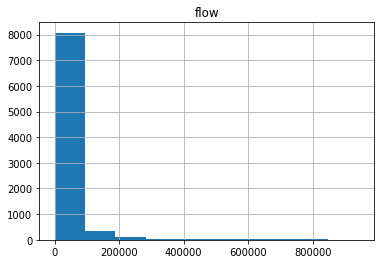

In [2]:
# get rid of edges with insignificant flow in the np network
# first, create a histogram of the flows
npdf = pd.read_csv('../SPREAD_food_networks/np/network/np/1.edges')
print(npdf['flow'].describe())
npdf.hist(column='flow')
# looking at this, I'll get rid of ~the bottom quartile (flow < 5)
print(npdf)
npdf.drop(npdf[npdf['flow'] < 5].index, inplace=True)
npdf.to_csv('../data/np_trade_significant.csv', index=False)
# print(np_sig)
# np_sig.to_csv('np_trade_significant.csv')

In [3]:
test = pd.read_csv('../data/np_trade_significant.csv')
print(test)

       source  destination          flow  month
0     1387378      1387379     21.803603      1
1     1387378      1387380  21639.938651      1
2     1387378      1387381   3824.145367      1
3     1387378      1387382   9583.036027      1
4     1387378      1387384  90902.789688      1
...       ...          ...           ...    ...
6475  1387418      1387408     37.239318     12
6476  1387418      1387409   3098.299453     12
6477  1387418      1387411  16618.260872     12
6478  1387418      1387412   8592.451104     12
6479  1387418      1387414    125.006317     12

[6480 rows x 4 columns]


In [4]:
# read in the nepal network

# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 1 12 out_np_delta_1.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 2 12 out_np_delta_2.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 3 12 out_np_delta_3.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 4 12 out_np_delta_4.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 5 12 out_np_delta_5.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 6 12 out_np_delta_6.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 7 12 out_np_delta_7.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 8 12 out_np_delta_8.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 9 12 out_np_delta_9.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 10 12 out_np_delta_10.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 11 12 out_np_delta_11.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 12 12 out_np_delta_12.csv

!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 1 12 out_np_delta_1.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 2 12 out_np_delta_2.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 3 12 out_np_delta_3.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 4 12 out_np_delta_4.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 5 12 out_np_delta_5.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 6 12 out_np_delta_6.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 7 12 out_np_delta_7.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 8 12 out_np_delta_8.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 9 12 out_np_delta_9.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 10 12 out_np_delta_10.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 11 12 out_np_delta_11.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 12 12 out_np_delta_12.csv

In [5]:
graphnp_d_1 = pd.read_csv('out_np_delta_1.csv')
graphnp_d_2 = pd.read_csv('out_np_delta_2.csv')
graphnp_d_3 = pd.read_csv('out_np_delta_3.csv')
graphnp_d_4 = pd.read_csv('out_np_delta_4.csv')
graphnp_d_5 = pd.read_csv('out_np_delta_5.csv')
graphnp_d_6 = pd.read_csv('out_np_delta_6.csv')
graphnp_d_7 = pd.read_csv('out_np_delta_7.csv')
graphnp_d_8 = pd.read_csv('out_np_delta_8.csv')
graphnp_d_9 = pd.read_csv('out_np_delta_9.csv')
graphnp_d_10 = pd.read_csv('out_np_delta_10.csv')
graphnp_d_11 = pd.read_csv('out_np_delta_11.csv')
graphnp_d_12 = pd.read_csv('out_np_delta_12.csv')

    t1  t2  count  delta
0    1   1     37      1
1    1   2     91      1
2    1   3      0      1
3    1   4      0      1
4    1   5      0      1
5    1   6      0      1
6    1   7      0      1
7    1   8      0      1
8    1   9      0      1
9    1  10      0      1
10   1  11      0      1
11   1  12      0      1
12   1  13      0      1
13   2   2     37      1
14   2   3     91      1
15   2   4      0      1
16   2   5      0      1
17   2   6      0      1
18   2   7      0      1
19   2   8      0      1
20   2   9      0      1
21   2  10      0      1
22   2  11      0      1
23   2  12      0      1
24   2  13      0      1
25   3   3     37      1
26   3   4     91      1
27   3   5      0      1
28   3   6      0      1
29   3   7      0      1
30   3   8      0      1
31   3   9      0      1
32   3  10      0      1
33   3  11      0      1
34   3  12      0      1
35   3  13      0      1
36   4   4     37      1
37   4   5    100      1
38   4   6      0      1


In [6]:
g = pd.concat([graphnp_d_1, graphnp_d_2, graphnp_d_3, graphnp_d_4, graphnp_d_5, graphnp_d_6, graphnp_d_7, graphnp_d_8, graphnp_d_9, graphnp_d_10, graphnp_d_11, graphnp_d_12])

<AxesSubplot:xlabel='t1', ylabel='count'>

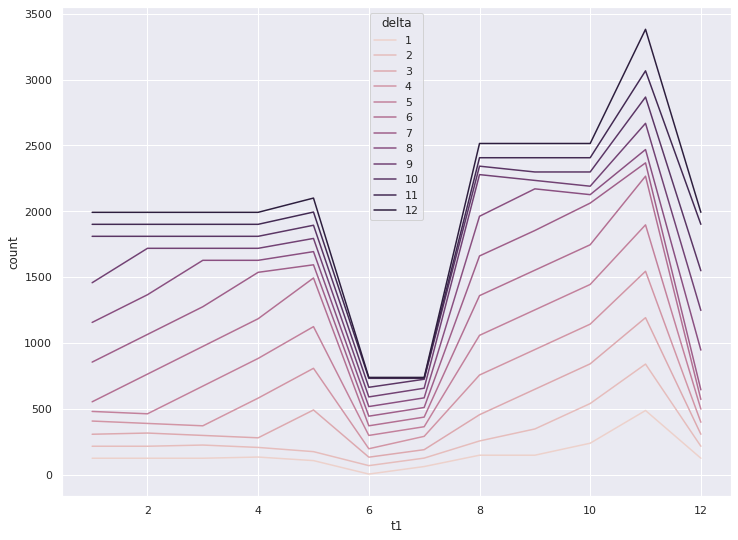

In [7]:
df=g[['t1', 'count', 'delta']].groupby(['t1', 'delta']).sum().reset_index()
sns.set(rc={'figure.figsize':(12,9)})

sns.lineplot(data=df, x='t1', y='count', hue='delta', legend='full')